In [ ]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris =load_iris()
x=iris.data
y=iris.target

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [ ]:
pca_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2'])
pca_df['target']=y

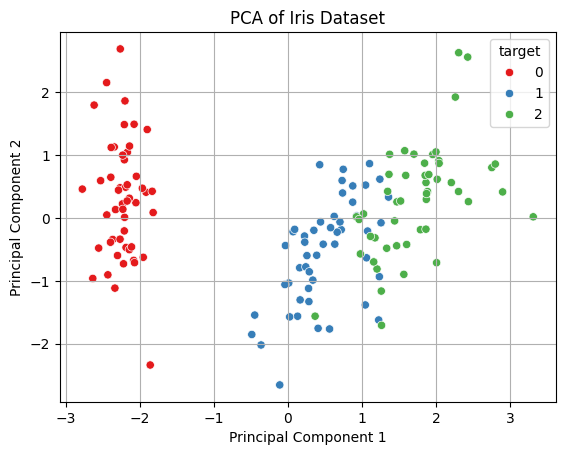

In [ ]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# A. The Perfect Separability of Iris-setosa
The most striking feature of the scatter plot is the complete separation of the red cluster, which corresponds to the Iris-setosa species (target=0). This cluster is distinctly isolated on the far left of the plot, with negative values along the Principal Component 1 axis.

This observation is not coincidental. It directly implies that the first principal component, which by definition captures the largest variance, is overwhelmingly defined by the features that morphologically distinguish Iris-setosa from the other two species. The unique physical characteristics of Iris-setosa (e.g., shorter and wider petals and sepals compared to the other species) are so pronounced that they constitute the primary source of variance in the dataset. PCA has effectively encoded this fundamental biological difference into the first principal component. A direct consequence of this perfect separation is that for a classification task, a simple linear classifier could achieve 100% accuracy in separating Iris-setosa from the other species using only the value of the first principal component as a feature.

# B. The Partial Separability of Iris-versicolor and Iris-virginica
In contrast to the Iris-setosa cluster, the blue (target=1, Iris-versicolor) and green (target=2, Iris-virginica) clusters are located closer to each other, with a noticeable region of overlap. Their separation is not defined by a single axis but is a function of both Principal Component 1 and Principal Component 2.

In [ ]:
print("Explained Variance Ratio by PCA components: ")
print(pca.explained_variance_ratio_)

Explained Variance Ratio by PCA components: 
[0.72962445 0.22850762]


This output indicates that the first principal component (PC1) accounts for approximately 72.96% of the total variance in the standardized dataset. The second principal component (PC2) accounts for an additional 22.85% of the total variance.

  A more profound understanding of these numbers comes from their summation. The cumulative explained variance for the first two components is 0.72962445+0.22850762=0.95813207. This calculation reveals a critical conclusion: by projecting the four-dimensional dataset onto a two-dimensional plane defined by the first two principal components, we successfully retain 95.81% of the total variance. This is a remarkable result. It implies that the original four features were highly correlated and that nearly all of the meaningful information about the data's structure can be compressed into just two orthogonal dimensions. The dataset's intrinsic dimensionality is demonstrably low.

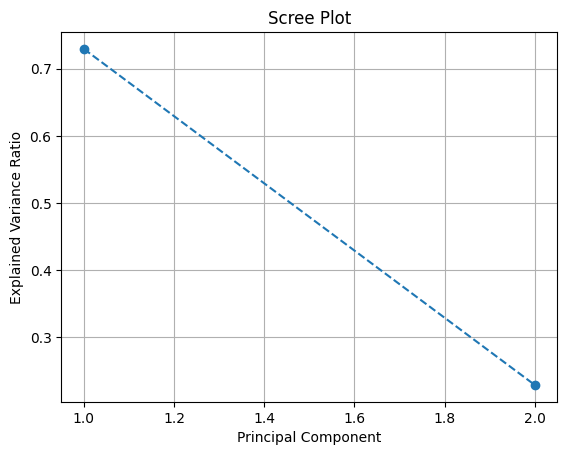

In [ ]:
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

The plot shows a steep descent from the first principal component to the second. The point at Principal Component 1 is positioned at a high value of approximately 0.73, while the point at Principal Component 2 drops significantly to a value around 0.23. This pattern is a classic example of what is often referred to as an "elbow" in a scree plot. The sharp decline in explained variance from the first component to the second, and the subsequent hypothetical flattening of the curve for any further components (if they were included), provides strong visual evidence that the first two components capture the vast majority of the data's variability.

 while a single component would result in a substantial loss of information (explaining only 73% of the variance), adding a third or fourth component would yield only marginal returns in explained variance while adding unnecessary complexity. Thus, the two-component solution is an optimal balance between dimensionality reduction and information preservation.